In [1]:
import numpy as np
import matplotlib.pyplot as plt

from vmls import levenberg_marquardt

# 19.1 Constrained nonlinear least squares

- add equality constraints to nonlinear least squares problem:
$$
\begin{align}
&\text{minimize} &\ f_1(x)^2 + \cdots + f_m(x)^2 \\
&\text{suject to} &\ g_i(x) = 0,\ i = 1, \ldots, p
\end{align}
$$
- $f_i(x)$ is ith (scalar) residual; $g_i(x) = 0$ is ith (scalar) equality constraint
- with vector notation $f(x) = (f_1(x), \ldots, f_m(x))$, $g(x) = (g_1(x), \ldots, g_p(x))$
$$
\begin{align}
&\text{minimize} &\ \|f(x)\|^2 \\
&\text{suject to} &\ g(x) = 0
\end{align}
$$
- $x$ is feasible if it satisfies the constraints $g(x) = 0$
- $\hat{x}$ is a solution if it is feasible and $\|f(x)\|^2 \ge \|f(\hat{x})\|^2$ for all feasible $x$
- When the functions $f$ and $g$ are *affine*, the equality constrained nonlinear least squares problem reduces to the (linear) least squares problem with equality constraints.
- When the constraint function $g$ is *affine*, this nonlinear least squares problem with linear equality constraints can be (approximately) solved by the Levenberg–Marquardt algorithm, by simply adding the linear equality constraints to the linear least squares problem that is solved in step 2.

## Lagrange multipliers


- the *Lagrangian* of the problem is the function
$$
\begin{align}
L(x, z) &= \|f(x)\|^2 + z_1g_1(x) + \cdots + z_pg_p(x) \\
&= \|f(x)\|^2 + g(x)^T z
\end{align}
$$
- p-vector $z = (z_1, \ldots, z_p)$ is vector of *Lagrange multipliers*
- method of Lagrange multipliers: if $\hat{x}$ is a solution, then there exists $\hat{z}$ with
$$
\frac{\partial L}{\partial x_i} (\hat{x}, \hat{z}) = 0, \ \ i = 1, \ldots, n. \quad 
\frac{\partial L}{\partial z_i} (\hat{x}, \hat{z}) = 0, \ \ i = 1, \ldots, p.
$$
(provided the gradients $\nabla g_1(\hat{x}), \ldots , \nabla g_p(\hat{x})$ (rows of $Dg(\hat{x})$) are linearly independent)
- $\hat{z}$ is called an *optimal Lagrange multiplier*

## Optimality condition

- gradient of Lagrangian with respect to $x$ is
$$
\nabla L_x(\hat{x},\hat{z}) = 2 Df(\hat{x})^T f(\hat{x}) + Dg(\hat{x})^T \hat{z}
$$
- gradient with respect to $z$ is
$$
\nabla L_z(\hat{x},\hat{z}) = g(\hat{x})
$$
- optimality condition: if $\hat{x}$ is optimal, then there exists $\hat{z}$ such that
$$
2 Df(\hat{x})^T f(\hat{x}) + Dg(\hat{x})^T \hat{z} = 0, \quad g(\hat{x}) = 0
$$
(provided the rows of $Dg(\hat{x})$ are linearly independent)
- this condition is necessary for optimality but not sufficient

---
- Recall constrained least squares problem
$$
\begin{align}
&\text{minimize} &\ \|Ax - b\|^2 \\
&\text{suject to} &\ Cx = d
\end{align}
$$
- a special case of the nonlinear problem with $f(x) = Ax − b$, $g(x) = Cx − d$
- apply general optimality condition:
$$
2 Df(\hat{x})^T f(\hat{x}) + Dg(\hat{x})^T \hat{z} = 2 A^T (A\hat{x} − b) + C^Tz = 0, \quad g(\hat{x}) = C\hat{x} − d= 0
$$
- these are the KKT equations
$$
\begin{bmatrix}
  2A^TA & C^T \\
  C & 0
\end{bmatrix}
\begin{bmatrix}
  \hat{x} \\
  \hat{z}
\end{bmatrix} =
\begin{bmatrix}
  2A^Tb \\
  d
\end{bmatrix}
$$

# 19.2 Penalty algorithm

- solve sequence of (unconstrained) nonlinear least squares problems
$$
\text{minimize} \quad \|f(x)\|^2 + \mu \|g(x)\|^2 =
\Bigg\|\begin{bmatrix}
f(x) \\
\sqrt{\mu}g(x)
\end{bmatrix}\Bigg\|^2
$$
- $\mu$ is a positive *penalty* parameter
- instead of insisting on $g(x) = 0$ we assign a penalty to deviations from zero
- for increasing sequence $\mu^{(1)}, \mu^{(2)}, \ldots$, compute $x^{(k+1)}$ by minimizing
$$
\|f(x)\|^2 + \mu^{(k)} \|g(x)\|^2
$$
- $x^{(k+1)}$ is computed by Levenberg–Marquardt algorithm started at $x^{(k)}$

---
**Termination**
- recall optimality condition $2Df(\hat{x})^T f(\hat{x}) + Dg(\hat{x})^T \hat{z} = 0$, $g(\hat{x}) = 0$
- $x^{(k)}$ satisfies normal equations for linear least squares problem:
$$
2Df(x^{(k)})^T f(x^{(k)}) + 2\mu^{(k−1)} Dg(x^{(k)})^T g(x^{(k)}) = 0
$$
- if we define $z^{(k)} = 2\mu^{(k−1)}g(x^{(k)})$, this can be written as
$$
2Df(x^{(k)})^T f(x^{(k)}) + Dg(x^{(k)})^T z^{(k)} = 0
$$
- we see that $x^{(k)}$, $z^{(k)}$ satisfy first equation in optimality condition
- feasibility $g(x^{(k)}) = 0$ is only satisfied approximately for $\mu^{(k−1)}$ large enough
- penalty method is terminated when $\|g(x^{(k)})\|$ becomes sufficiently small

---
**Algorithm** Penalty algorithm for constrained nonlinear least squares

**given** differentiable functions $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ and $g: \mathbb{R}^n \rightarrow \mathbb{R}^p$ , and an initial point $x^{(1)}$. Set $\mu^{(1)} = 1$.

For $k = 1, 2, . . . , k^{max}$

1. *Solve unconstrained nonlinear least squares problem.* Set $x^{(k+1)}$ to be the (approximate) minimizer of
$$
\|f(x)\|^2 + \mu^{(k)} \|g(x)\|^2
$$
using the Levenberg–Marquardt algorithm, starting from initial point $x^{(k)}$.
2. *Update* $\mu^{(k)}$: $\mu^{(k+1)} = 2\mu^{(k)}$.

In [2]:
def penalty_method(f, Df, g, Dg, x1, lambda1, kmax=100, feas_tol=1e-4, oc_tol=1e-4):
    x = x1
    mu = 1.0
    #  feasibility condition residual
    feas_res = np.array([np.linalg.norm(g(x))])
    # optimal condition residual
    oc_res = np.array([
        np.linalg.norm(2 * Df(x).T * f(x)
                       + 2 * mu * Dg(x).T * g(x))
    ])
    lm_iters = []
    F = lambda x: np.vstack([f(x), np.sqrt(mu)*g(x)])
    DF = lambda x: np.vstack([Df(x), np.sqrt(mu)*Dg(x)])
    for k in range(kmax):
        # minimize norm(F(x)) by levenberg marquardt
        # F(x) = [f(x); sqrt(mu)*g(x)]
        x, hist = levenberg_marquardt(F, DF, x, lambda1, tol=oc_tol)
        feas_res = np.vstack([feas_res, np.linalg.norm(g(x))])
        oc_res = np.vstack([oc_res, np.array(hist["residuals"])[-1]])
        lm_iters.append(len(hist["residuals"])) 
        if np.linalg.norm(g(x)) < feas_tol:
            break
        mu = 2*mu
    return x, {'lm_iterations': lm_iters, 'feas_res': feas_res, 'oc_res': oc_res}

**Example.** We apply the method to a problem with two variables
$$
f(x1, x2) = \begin{bmatrix}
x_1 + exp(−x_2) \\
x_1^2 + 2x_2 + 1
\end{bmatrix} \quad
g(x1, x2) = x_1 + x_1^3 + x_2 + x_2^2.
$$

In [3]:
f = lambda x: np.vstack([x[0] + np.exp(-x[1]), x[0]**2 + 2*x[1] + 1])
Df = lambda x: np.vstack([[1 , -np.exp(-x[1, 0])],
                          [2*x[0, 0] , 2]])
g = lambda x: np.array([x[0] + x[0]**3 + x[1] + x[1]**2])
Dg = lambda x: np.hstack([1 + 3*x[0]**2, 1+ 2*x[1]])
x, hist = penalty_method(f, Df, g, Dg,  np.array([[0.5], [-0.5]]), 1.0)
print(x)

[[-3.33495514e-05]
 [-2.76824972e-05]]


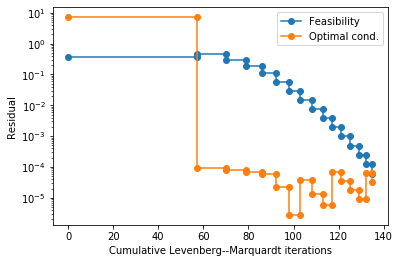

In [4]:
cum_lm_iters = np.cumsum(hist["lm_iterations"], axis=0)
itr = np.hstack([0, np.hstack([[i,i] for i in cum_lm_iters])])
feas_res = np.hstack((np.hstack([[r, r] for r in hist['feas_res'][0:-1, 0]]), hist['feas_res'][-1, 0]))
oc_res = np.hstack((np.hstack([[r, r] for r in hist['oc_res'][0:-1, 0]]), hist['oc_res'][-1, 0]))
plt.plot(itr, feas_res, 'o-')
plt.plot(itr, oc_res, 'o-')
plt.yscale("log")
plt.xlabel("Cumulative Levenberg--Marquardt iterations")
plt.ylabel("Residual")
plt.legend(["Feasibility", "Optimal cond."])
plt.show()

# 19.3 Augmented Lagrangian algorithm

## Drawback of penalty method
- $\mu^{(k)}$ increases rapidly and must become large to drive $g(x)$ to (near) zero
- for large $\mu^{(k)}$, nonlinear least squares subproblem becomes harder
- for large $\mu^{(k)}$, Levenberg–Marquardt method can take a large number of iterations, or fail

## Augmented Lagrangian
- the *augmented Lagrangian* for the constrained nonlinear least square problem is
$$
\begin{align}
L_\mu(x, z) &= L(x, z) + \mu \|g(x)\|^2 \\ &= \|f(x)\|^2 + g(x)^T z + \mu \|g(x)\|^2
\end{align}
$$
- this is the Lagrangian $L(x,z)$ augmented with a quadratic penalty term $\mu \|g(x)\|^2$
- $\mu$ is a positive penalty parameter
- augmented Lagrangian is the Lagrangian of the equivalent problem
$$
\begin{align}
&\text{minimize} &\ &\|f(x)\|^2 + \mu \|g(x)\|^2\\
&\text{suject to} &\ &g(x) = 0
\end{align}
$$

## Minimizing the augmented Lagrangian
- equivalent expressions for augmented Lagrangian
$$
\begin{align}
L_\mu(x, z) 
&= \|f(x)\|^2 + g(x)^T z + \mu \|g(x)\|^2 \\
&= \|f(x)\|^2 + g(x)^T z + \mu \|g(x)\|^2 + \mu \|z/(2\mu)\|^2 - \mu \|z/(2\mu)\|^2\\
&= \|f(x)\|^2 + \mu\|g(x) + z/(2\mu)\|^2 - \mu \|z/(2\mu)\|^2 \\
&= \Bigg\| \begin{bmatrix} f(x) \\ \sqrt{\mu}g(x) + z/(2\sqrt{\mu}) \end{bmatrix} \Bigg\|^2 - \mu \|z/(2\mu)\|^2
\end{align}
$$
- can be minimized over $x$ (for fixed $\mu$, $z$) by Levenberg–Marquardt method:
$$
\text{minimize} \ \Bigg\| \begin{bmatrix} f(x) \\ \sqrt{\mu}g(x) + z/(2\sqrt{\mu}) \end{bmatrix} \Bigg\|^2
$$

## Lagrange multiplier update
- minimizer $\tilde{x}$ of augmented Lagrangian $L_\mu(x, z)$ satisfies
$$
\begin{align}
0 
&= 2 Df(\tilde{x})^T f(\tilde{x}) + 2 \mu Dg(\tilde{x})^T (g(\tilde{x}) + z/(2mu)) \\
&= 2 Df(\tilde{x})^T f(\tilde{x}) + Dg(\tilde{x})^T (2 \mu g(\tilde{x}) + z) \\
\end{align}
$$
- if we define $\tilde{z} = z + 2 \mu g(\tilde{x})$ this can be written as
$$
2 Df(\tilde{x})^T f(\tilde{x}) + Dg(\tilde{x})^T \tilde{z} = 0
$$
- this is the first equation in the optimality conditions
$$
2 Df(\tilde{x})^T f(\tilde{x}) + Dg(\tilde{x})^T \tilde{z} = 0, \quad g(\tilde{x}) = 0
$$
- shows that if $g(\tilde{x}) = 0$, then $\tilde{x}$ is optimal
- if $g(\tilde{x})$ is not small, suggests $\tilde{z}$ is a good update for $z$

**Algorithm** Augmented Lagrangian algorithm

**given** differentiable functions $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ and $g: \mathbb{R}^n \rightarrow \mathbb{R}^p$, and an initial point $x^{(1)}$. Set $z^{(1)} = 0$, $\mu^{(1)} = 1$.

For $k = 1, 2, \ldots, k^{max}$
1. *Solve unconstrained nonlinear least squares problem.* Set $x^{(k+1)}$ to be the (approximate) minimizer of
$$
\|f(x)\|^2 + \mu^{(k)} \|g(x) + z^{(k)}/(2 \mu^{(k)})\|^2
$$
using Levenberg–Marquardt algorithm, starting from initial point $x^{(k)}$.
2. *Update* $z^{(k)}$.
$$
z^{(k+1)} = z^{(k)} + 2 \mu^{(k)} g(x^{(k+1)}).
$$
3. *Update* $\mu^{(k)}$.
$$
\mu^{(k+1)} = \begin{cases}
\mu^{(k)} & \|g(x^{(k+1)})\| < 0.25 \|g(x^{(k)})\| \\
2\mu^{(k)} & \|g(x^{(k+1)})\| \ge 0.25 \|g(x^{(k)})\| \\
\end{cases}
$$


- The penalty parameter $\mu$ is increased only when needed, when $\|g(x)\|$ does not sufficiently decrease
- continues until $g(x^{(k)})$ is sufficiently small (or iteration limit is reached)

In [5]:
def aug_lag_method(f, Df, g, Dg, x1, lambda1, kmax=100, feas_tol=1e-4, oc_tol=1e-4):
    x = x1
    z = np.zeros(len(g(x)))
    mu = 1.0
    #  feasibility condition residual
    feas_res = np.array([np.linalg.norm(g(x))])
    # optimal condition residual
    oc_res = np.array([
        np.linalg.norm(2 * Df(x).T * f(x)
                       + 2 * mu * Dg(x).T * g(x))
    ])
    lm_iters = []
    F = lambda x: np.vstack([f(x), np.sqrt(mu)*(g(x) + z/(2*mu))])
    DF = lambda x: np.vstack([Df(x), np.sqrt(mu)*Dg(x)])
    for k in range(kmax):
        # minimize norm(F(x)) by levenberg marquardt
        # F(x) = [f(x); sqrt(mu)*(g(x) + z/(2*mu))]
        x, hist = levenberg_marquardt(F, DF, x, lambda1, tol=oc_tol)
        z = z + 2*mu*g(x)
        feas_res = np.vstack([feas_res, np.linalg.norm(g(x))])
        oc_res = np.vstack([oc_res, np.array(hist["residuals"])[-1]])
        lm_iters.append(len(hist["residuals"])) 
        if np.linalg.norm(g(x)) < feas_tol:
            break
        if ~(np.linalg.norm(g(x)) < 0.25*feas_res[-2]):
            mu = 2*mu
    return x, z, {'lm_iterations': lm_iters, 'feas_res': feas_res, 'oc_res': oc_res}

In [6]:
x, z, hist = aug_lag_method(f, Df, g, Dg,  np.array([[0.5], [-0.5]]), 1.0)
print(x)
print(z)

[[-1.86466149e-05]
 [-1.50085678e-05]]
[[-1.99995813]]


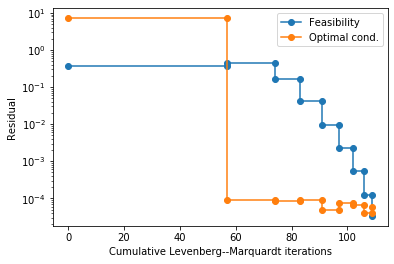

In [7]:
cum_lm_iters = np.cumsum(hist["lm_iterations"], axis=0)
itr = np.hstack([0, np.hstack([[i,i] for i in cum_lm_iters])])
feas_res = np.hstack((np.hstack([[r, r] for r in hist['feas_res'][0:-1, 0]]), hist['feas_res'][-1, 0]))
oc_res = np.hstack((np.hstack([[r, r] for r in hist['oc_res'][0:-1, 0]]), hist['oc_res'][-1, 0]))
plt.plot(itr, feas_res, 'o-')
plt.plot(itr, oc_res, 'o-')
plt.yscale("log")
plt.xlabel("Cumulative Levenberg--Marquardt iterations")
plt.ylabel("Residual")
plt.legend(["Feasibility", "Optimal cond."])
plt.show()